## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [21]:
dataset=pd.read_csv("Airports.csv")
dataset

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
...,...,...,...,...,...,...,...
245,46,United States Newark Liberty International Air...,"Newark, New Jersey",United States,EWR/KEWR,40289969,2016
246,47,Philippines Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL/RPLL,39534991,2016
247,48,Japan Narita International Airport,"Narita, Chiba",Japan,NRT/RJAA,39000563,2016
248,49,United States Minneapolis/St Paul Internationa...,"St. Paul, Minnesota",United States,MSP/KMSP,37413728,2016


In [22]:
X = dataset.iloc[:, [5, 6]].values # independent variables

## Checking whether the missing values are present in the dataset or not

In [41]:
dataset.isnull().sum() # this shows we have no missing values over here in this dataset

Rank          0
Airport       0
Location      0
Country       0
Code          0
Passengers    0
Year          0
dtype: int64

In [42]:
print(X)

[[ 43760427      2020]
 [ 42918685      2020]
 [ 40741509      2020]
 [ 39364990      2020]
 [ 37916059      2020]
 [ 34937789      2020]
 [ 34513827      2020]
 [ 33741129      2020]
 [ 32989127      2020]
 [ 31165641      2020]
 [ 31073884      2020]
 [ 30965027      2020]
 [ 30860251      2020]
 [ 30476531      2020]
 [ 28779527      2020]
 [ 28501000      2020]
 [ 28224342      2020]
 [ 27200000      2020]
 [ 25900000      2020]
 [ 23409000      2020]
 [ 22257469      2020]
 [ 22109726      2020]
 [ 21981711      2020]
 [ 21928708      2020]
 [ 21900000      2020]
 [ 21617803      2020]
 [ 21406709      2020]
 [ 21054696      2020]
 [ 20887174      2020]
 [ 20322520      2020]
 [ 20061507      2020]
 [ 19906576      2020]
 [ 19784000      2020]
 [ 19223825      2020]
 [ 18770998      2020]
 [ 18663858      2020]
 [ 18213571      2020]
 [ 17446239      2020]
 [ 17112000      2020]
 [ 16982456      2020]
 [ 16710197      2020]
 [ 16706000      2020]
 [ 16630642      2020]
 [ 16583878

## Using the elbow method to find the optimal number of clusters
### we will have to find the number of cluster at that location where the decay will become gradual

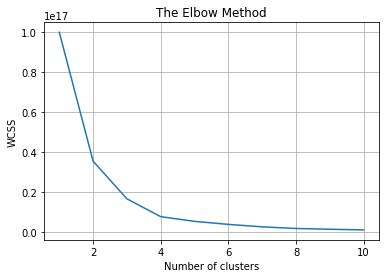

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

## Training the K-Means model on the dataset

In [26]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) 

In [43]:
print(y_kmeans) # our dependent variable

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


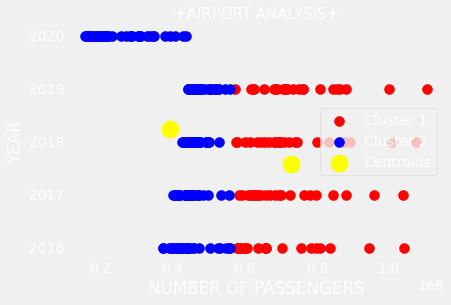

In [44]:
from matplotlib import style
style.use("fivethirtyeight")
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('✈AIRPORT ANALYSIS✈',size=15)
plt.xlabel('NUMBER OF PASSENGERS')
plt.ylabel('YEAR')
plt.grid()
plt.legend()
plt.show()

## Observations
### we have more number of passengers from year 2016 to 2019 as per the results of first cluster and we have very less passengers in 2020 year as per the results of second cluster as we all know that in that particular year the whole world was suffering from covid 19 lockdowns due to which we got lesser number of passengers in that year